##### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.ensemble import RandomForestRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error


##### Data

In [2]:
# data
df = pd.read_csv("one_hot_dataset.csv")

In [3]:
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [8]:
# Random Forest Scaled
rf_scaled = RandomForestRegressor()
rf_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = rf_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.43609198172071156


In [9]:
# Random Forest PCA
rf_pca = RandomForestRegressor()
rf_pca.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.49570867078331377


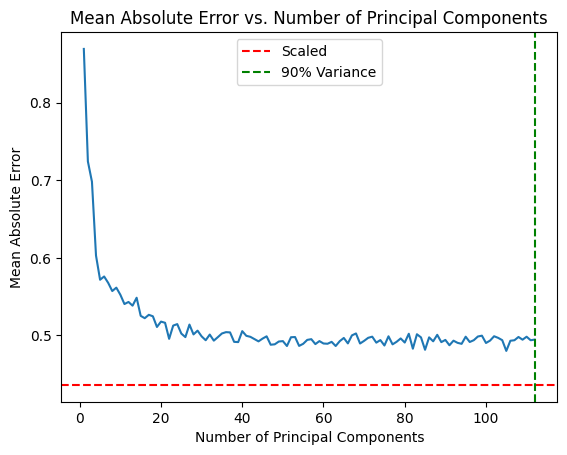

In [10]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    rf = RandomForestRegressor()
    rf.fit(x_train_pca, y_train)
    y_pred = rf.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(105, 0.47997133749327753)

In [12]:
num_components

range(1, 113)

In [13]:
mae_values

[0.8694632547033018,
 0.724371346706972,
 0.6982019353177872,
 0.6029123447797707,
 0.571747424895936,
 0.5759569769701708,
 0.5677058597159721,
 0.5571681535606247,
 0.5615660918660023,
 0.5523365343731228,
 0.5404231765256973,
 0.5430869045488061,
 0.5383183130516244,
 0.5485448273209654,
 0.5251903656752277,
 0.5221545274620307,
 0.5265205435307603,
 0.5246261944136565,
 0.5108364647826334,
 0.517755316996909,
 0.5162299745607671,
 0.49553271333920895,
 0.5126183277734009,
 0.5145332375631909,
 0.5023284080156748,
 0.4977674020042899,
 0.5139298144957894,
 0.5012439788628184,
 0.5060918455070681,
 0.4987081332676993,
 0.49373007622214937,
 0.5010394900764966,
 0.49320093292189215,
 0.49775623552155074,
 0.5024664305673842,
 0.5041594764377312,
 0.5038339606909722,
 0.4916503187368265,
 0.4913194527840293,
 0.505460889460782,
 0.49944140801831083,
 0.49812152054073416,
 0.49521434166416317,
 0.4922694243512207,
 0.495839374650161,
 0.49877556384419763,
 0.4879373032046332,
 0.4884704